In [1]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [5]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
features = df.drop(['Channel', 'Region'], axis=1)
features

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


<Axes: >

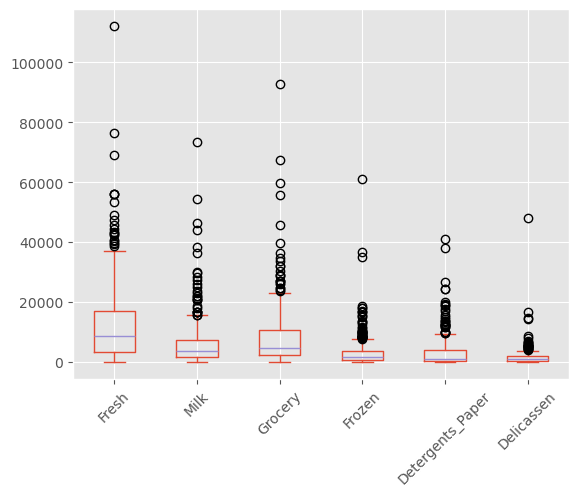

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
features.plot.box(rot=45)

Text(0, 0.5, 'Milk (m.u.)')

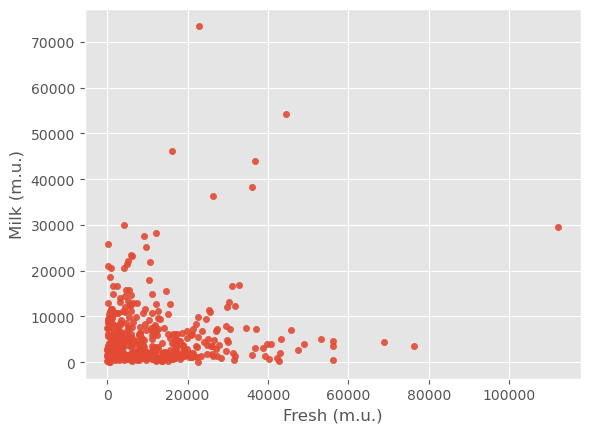

In [21]:
plt.scatter(features.Fresh, features.Milk, s=20, alpha=.9)
plt.xlabel('Fresh (m.u.)')
plt.ylabel('Milk (m.u.)')

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(features)
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

The standardization method used by `StandardScaler` is called **Z-score normalization** or simply **Z-score standardization**.

It is based on the **Z-score formula**:

$$
X' = \frac{X - \mu}{\sigma}
$$

### Other Names for This Scaler:
- **Standard Score Normalization**
- **Standardization**
- **Z-Score Scaling**
- **Mean-Centering with Unit Variance Scaling**

This method is commonly used in machine learning to **normalize features** so that they have **zero mean and unit variance**.


In [24]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

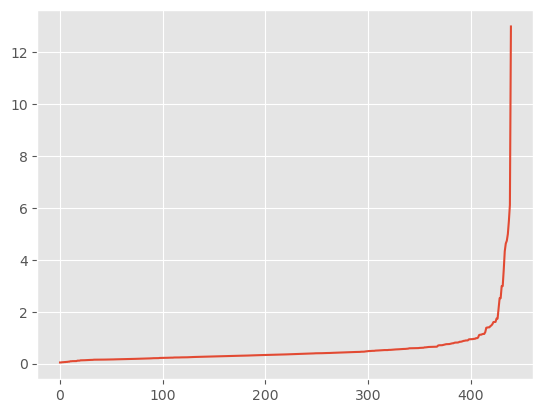

In [25]:
import numpy as np

distances = np.sort(distances[:,1])
plt.plot(distances)

In [29]:
! pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


In [30]:
from kneed import KneeLocator

kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
optimal_epsilon = distances[kneedle.knee]
print("Optimal epsilon: ", optimal_epsilon)

Optimal epsilon:  1.6070889053161401


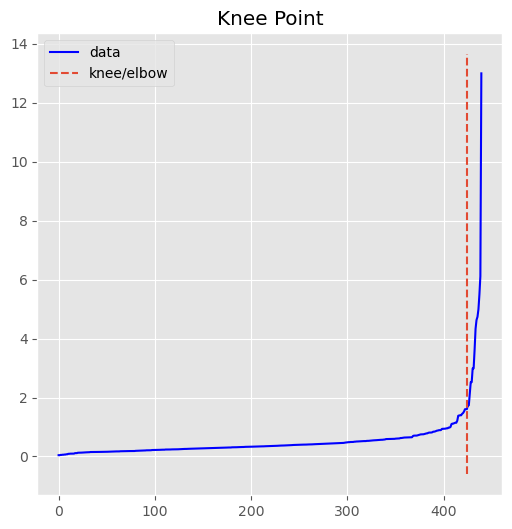

In [31]:
kneedle.plot_knee()

In [32]:
min_samples = 2*len(X[0])
min_samples

12

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=optimal_epsilon, min_samples=min_samples).fit(X)

In [34]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [35]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 29


In [36]:
from sklearn import metrics

print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Silhouette Coefficient: 0.652


In [37]:
# add the cluster labels on the result DateFrame
results = features.copy()
results['Clusters'] = dbscan.labels_

results.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [39]:
results['Clusters'].value_counts()

Clusters
 0    411
-1     29
Name: count, dtype: int64

In [41]:
! pip install seaborn

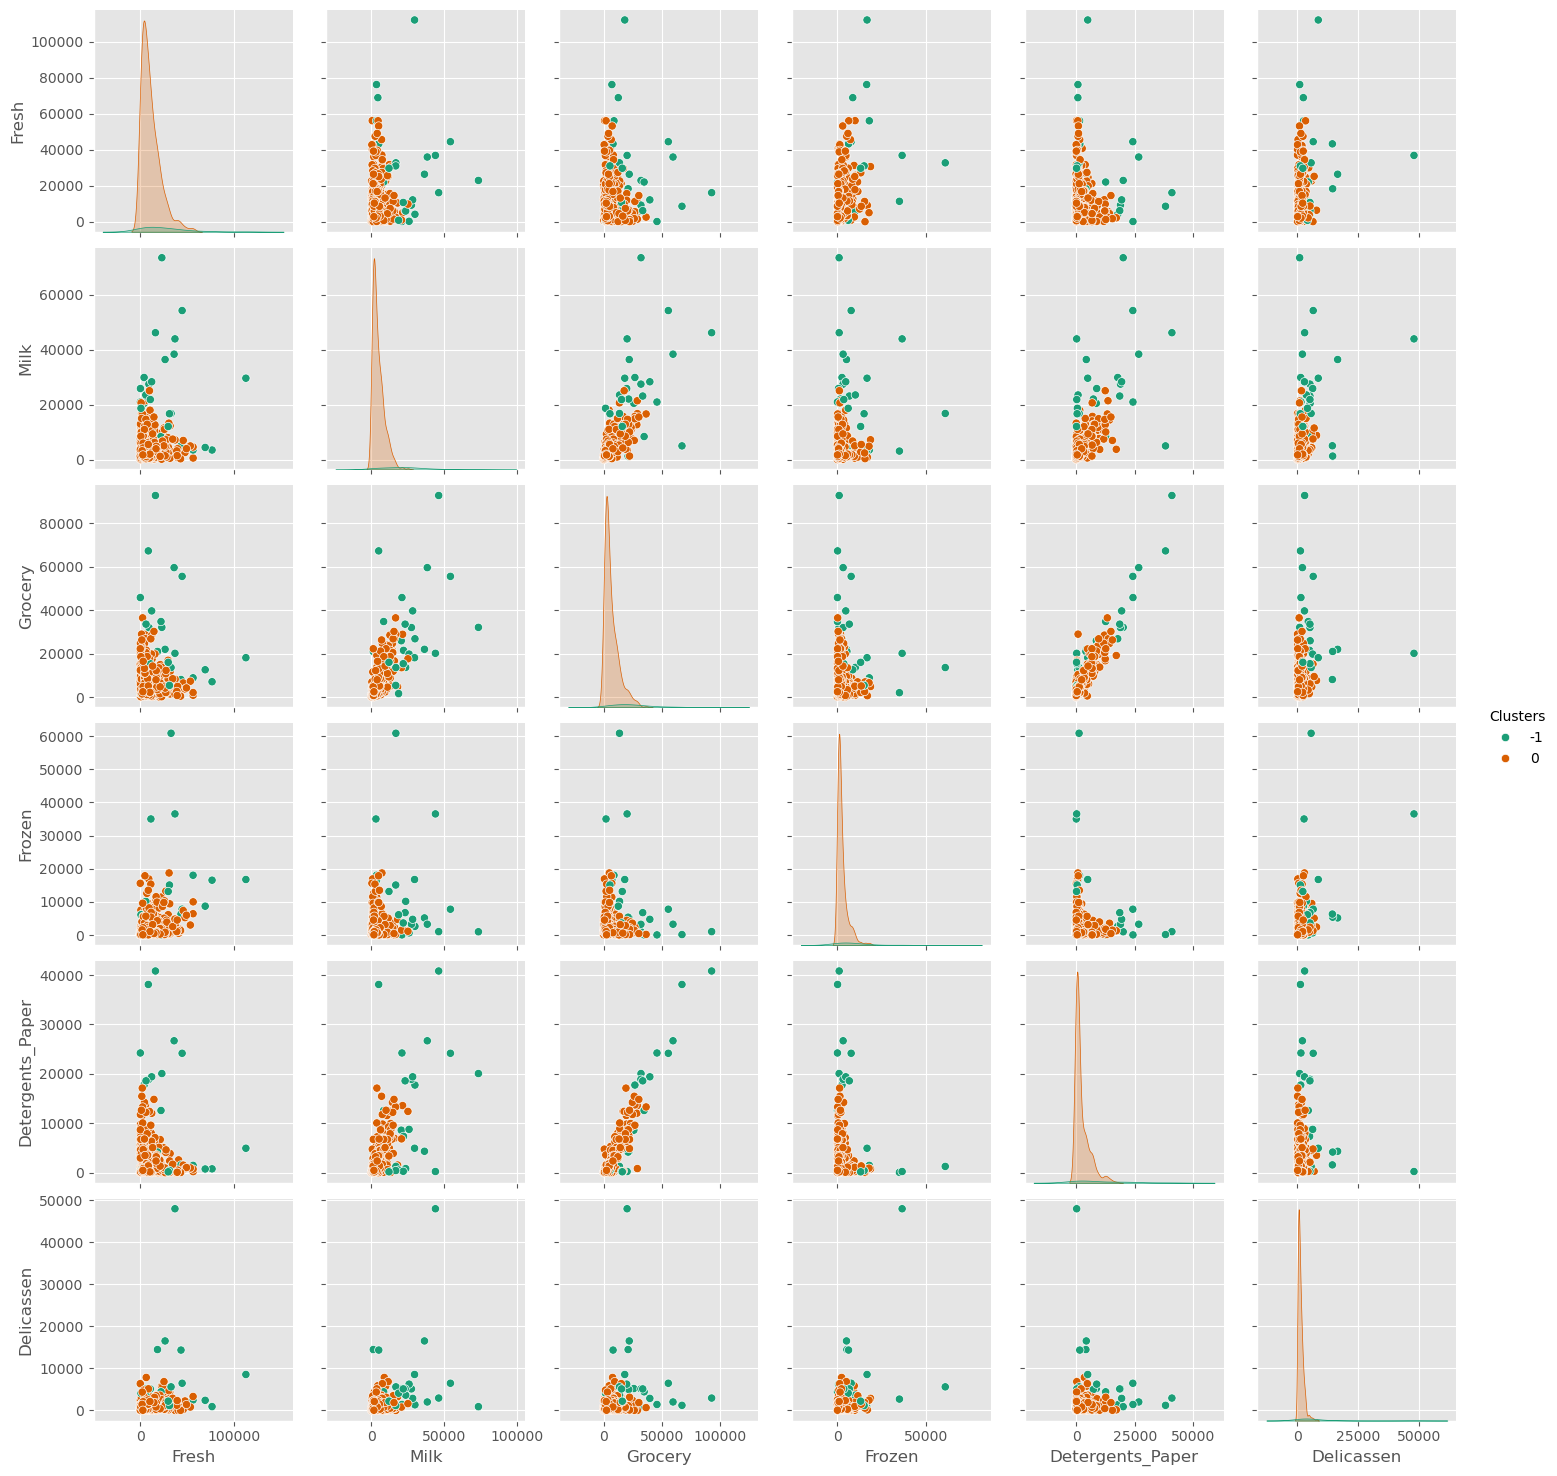

In [42]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(results, hue='Clusters', palette='Dark2')

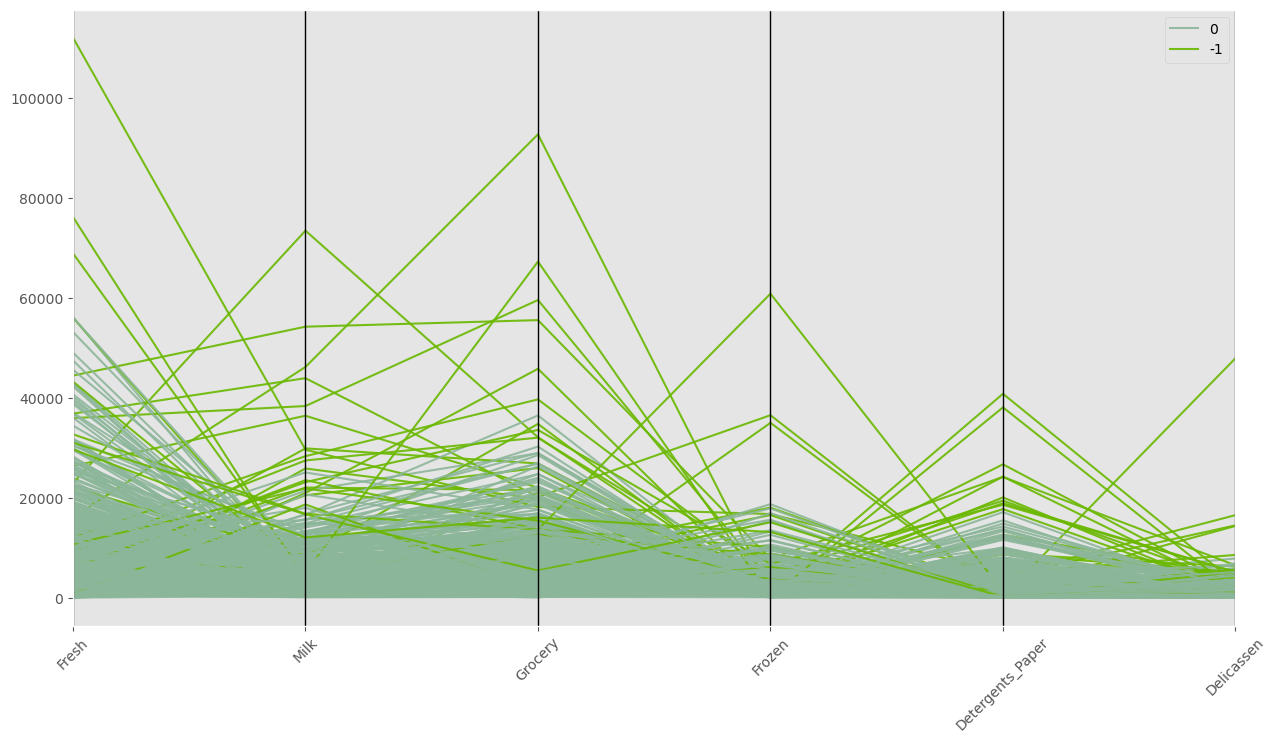

In [43]:
plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(results,'Clusters',alpha=0.90)

plt.xticks(rotation=45)
plt.show()

In [44]:
results_mean = results.groupby(['Clusters']).mean()
results_mean.reset_index(inplace=True)

results_mean

,Clusters,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1,25912.965517,22903.413793,26671.758621,10052.137931,10619.655172,6292.758621
1,0,11018.625304,4589.192214,6630.367397,2579.411192,2335.491484,1188.450122


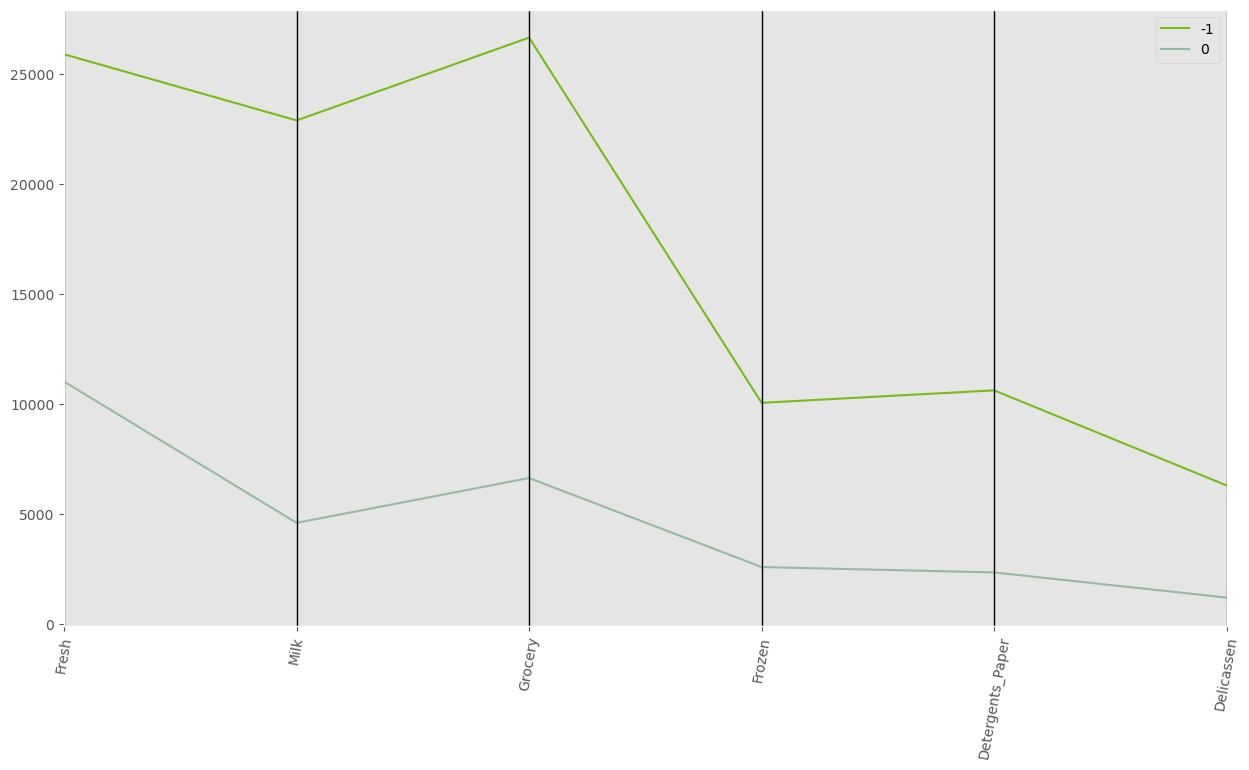

In [45]:
plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(results_mean,'Clusters',alpha=0.9,sort_labels=True)

plt.xticks(rotation=80)
plt.show()